Final Project Submission <br>
Student name: Qilun Chen, Evan Serrano<br>
Student pace: full time<br>
Scheduled project review date/time: April/1/2022<br>
Instructor name: Praveen Gowtham, Joe Comeaux<br>
Blog post URL:https://github.com/nkbuddy/dsc-phase-3-project-NBA

### Table of Contents
* [STEP 1: Define the Problem](#Define-the-Problem)
* [Step 2: Gather the Data](#Gather-the-Data)
* [Step 3: Prepare Data for Consumption](#Prepare-Data-for-Consumption)
    * [3.1 Import Libraries](#Import-Libraries)
        * [3.11 Load Data Modelling Libraries](#Load-Data-Modelling-Libraries)
    * [3.2 Meet and Greet Data](#Meet-and-Greet-Data)
        * [3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting](#4C)
        * [3.22 Clean Data](#Clean-Data)
        * [3.23 Convert Formats](#Convert-Formats)
        * [3.24 Da-Double Check Cleaned Data](#Da-Double-Check-Cleaned-Data)
        * [3.25 Split Training and Testing Data](#Split-Training-and-Testing-Data)
* [Step 4: Perform Exploratory Analysis with Statistics](#Perform-Exploratory-Analysis-with-Statistics)
* [Step 5: Model Data](#Model-Data)
    * [5.1 Evaluate Model Performance](#Evaluate-Model-Performance)
        * [5.11 Model Performance with Cross-Validation (CV)](#CV)
        * [5.12 Tune Model with Hyper-Parameters](#Tune-Model-with-Hyper-Parameters)
        * [5.13 Tune Model with Feature Selection](#Tune-Model-with-Feature-Selection)
* [Step 6: Validate and Implement](#Validate-and-Implement)
* [STEP 7: Optimize and Strategize](#Optimize-and-Strategize)

# STEP 1: Define the Problem <a class="anchor" id="Define-the-Problem"></a>

Analysis of what sorts of XXX were likely to make a shot in NBA. In particular, we ask you to apply the tools of machine learning to predict which XX make the shot.<br>

Binary classification problem

# Step 2: Gather the Data <a class="anchor" id="Gather-the-Data"></a>

The dataset is also given to us at kaggle https://www.kaggle.com/datasets/dansbecker/nba-shot-logs

# Step 3: Prepare Data for Consumption <a class="anchor" id="Prepare-Data-for-Consumption"></a>

## 3.1 Import Libraries <a class="anchor" id="Import-Libraries"></a>

In [3]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import random
import time
import warnings
import datetime
warnings.filterwarnings('ignore')
from subprocess import check_output

## 3.11 Load Data Modelling Libraries <a class="anchor" id="Load-Data-Modelling-Libraries"></a>

In [102]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, set_config
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy import stats as stats
from pandas.plotting import scatter_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

## 3.2 Meet and Greet Data <a class="anchor" id="Meet-and-Greet-Data"></a>

1)The FGM variable is outcome or dependent variable. It is a binary nominal datatype of 1 for make and 0 for missed. 
All other variables are potential or independent variables. 
Its important to note, more predictor variables do not make a better model, but the right variables.
<br>
2)The GameID, match, win, Final_margin, shot_number, and PTS are assumed to be random unique identifiers, that have no impact on the outcome veribale. Thus, they will be excluded from analysis.
<br>
4)The Name and shot_number variable are nominal datatype. It could be used in feature engineering to derive the who the best defender is, the hot-hand hypothesis, etc. Since these variables already exist, we'll make use of it to see if player makes a difference.
<br>
5)The Location and PTS_type variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
<br>
6)The game_clock, shot_clock, dribbles,  touch_time, shot_distance, and closet_defender_distance variable are continuous quantitative datatypes.
<br>
7)The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.
<br>
8)The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.


In [5]:
df = pd.read_csv('shot_logs.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


### 3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting <a class="anchor" id="4C"></a>

In [6]:
print('columns with null values:\n', df.isnull().sum())


columns with null values:
 GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64


In [7]:
df.describe(include = 'all')

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
count,1.280690e+05,128069,128069,128069,128069.000000,128069.000000,128069.000000,128069,122502.000000,128069.000000,...,128069.000000,128069.000000,128069,128069,128069.000000,128069.000000,128069.000000,128069.000000,128069,128069.000000
unique,NaN,1808,2,2,NaN,NaN,NaN,719,NaN,NaN,...,NaN,NaN,2,473,NaN,NaN,NaN,NaN,281,NaN
top,NaN,"FEB 07, 2015 - DAL vs. POR",A,W,NaN,NaN,NaN,0:01,NaN,NaN,...,NaN,NaN,missed,"Ibaka, Serge",NaN,NaN,NaN,NaN,james harden,NaN
freq,NaN,105,64135,64595,NaN,NaN,NaN,859,NaN,NaN,...,NaN,NaN,70164,814,NaN,NaN,NaN,NaN,1054,NaN
mean,2.140045e+07,NaN,NaN,NaN,0.208723,6.506899,2.469427,NaN,12.453344,2.023355,...,13.571504,2.264670,NaN,NaN,159038.487284,4.123015,0.452139,0.997314,NaN,157238.251247
std,2.578773e+02,NaN,NaN,NaN,13.233267,4.713260,1.139919,NaN,5.763265,3.477760,...,8.888964,0.441159,NaN,NaN,78791.172947,2.756446,0.497706,1.130978,NaN,79362.389336
min,2.140000e+07,NaN,NaN,NaN,-53.000000,1.000000,1.000000,NaN,0.000000,0.000000,...,0.000000,2.000000,NaN,NaN,708.000000,0.000000,0.000000,0.000000,NaN,708.000000
25%,2.140023e+07,NaN,NaN,NaN,-8.000000,3.000000,1.000000,NaN,8.200000,0.000000,...,4.700000,2.000000,NaN,NaN,101249.000000,2.300000,0.000000,0.000000,NaN,101162.000000
50%,2.140045e+07,NaN,NaN,NaN,1.000000,5.000000,2.000000,NaN,12.300000,1.000000,...,13.700000,2.000000,NaN,NaN,201949.000000,3.700000,0.000000,0.000000,NaN,201939.000000
75%,2.140067e+07,NaN,NaN,NaN,9.000000,9.000000,3.000000,NaN,16.675000,2.000000,...,22.500000,3.000000,NaN,NaN,203079.000000,5.300000,1.000000,2.000000,NaN,202704.000000


### 3.22 Clean Data <a class="anchor" id="Clean-Data"></a>

In [8]:
df['SHOT_CLOCK'].fillna(0, inplace = True)

In [9]:
df['TOUCH_TIME'] = df['TOUCH_TIME'].clip(lower=0)

In [10]:
import datetime
df['TIME_ELAPSED_SECS'] = pd.to_datetime(df['GAME_CLOCK'], format='%M:%S')
df['TIME_ELAPSED_SECS'] = df['TIME_ELAPSED_SECS'].dt.hour * 3600 + df['TIME_ELAPSED_SECS'].dt.minute * 60 + df['TIME_ELAPSED_SECS'].dt.second
df['TIME_ELAPSED_SECONDS'] = (720 * df['PERIOD']) - df['TIME_ELAPSED_SECS']

In [11]:
df['LOCATION'] = df['LOCATION'].astype('category')
df['LOCATION'] = df['LOCATION'].cat.codes

In [12]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [13]:
drop_column = ['GAME_ID','MATCHUP', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER','CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID','PTS','player_name','player_id', 'SHOT_RESULT','GAME_CLOCK','PERIOD','TIME_ELAPSED_SECS']
df = df.drop(drop_column, axis=1)
print(df.isnull().sum())

LOCATION                0
SHOT_CLOCK              0
DRIBBLES                0
TOUCH_TIME              0
SHOT_DIST               0
PTS_TYPE                0
CLOSE_DEF_DIST          0
FGM                     0
TIME_ELAPSED_SECONDS    0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   LOCATION              128069 non-null  int8   
 1   SHOT_CLOCK            128069 non-null  float64
 2   DRIBBLES              128069 non-null  int64  
 3   TOUCH_TIME            128069 non-null  float64
 4   SHOT_DIST             128069 non-null  float64
 5   PTS_TYPE              128069 non-null  int64  
 6   CLOSE_DEF_DIST        128069 non-null  float64
 7   FGM                   128069 non-null  int64  
 8   TIME_ELAPSED_SECONDS  128069 non-null  int64  
dtypes: float64(4), int64(4), int8(1)
memory usage: 7.9 MB


### 3.23 Convert Formats <a class="anchor" id="Convert-Formats"></a>

In [15]:
df.loc[df['TOUCH_TIME']>1]

,LOCATION,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,TIME_ELAPSED_SECONDS
0,0,10.8,2,1.9,7.7,2,1.3,1,651
2,0,0.0,3,2.7,10.1,2,0.9,0,720
3,0,10.3,2,1.9,17.2,2,3.4,0,733
4,0,10.9,2,2.7,3.7,2,1.1,0,806
5,0,9.1,2,4.4,18.4,2,2.6,0,945
...,...,...,...,...,...,...,...,...,...
128064,0,18.3,5,6.2,8.7,2,0.8,0,2048
128065,0,19.8,4,5.2,0.6,2,0.6,1,2192
128066,0,23.0,2,4.2,16.9,2,4.2,1,2210
128067,0,9.1,4,4.5,18.3,2,3.0,0,2723


In [16]:
df[['IsCatchAndShot','IsLayupOrDunk','Is3point','IsOpen']] = 1
df["IsCatchAndShot"].loc[df["TOUCH_TIME"]>1] = 0
df['IsLayupOrDunk'].loc[df['SHOT_DIST']>3] = 0
df['Is3point'].loc[df['PTS_TYPE']==2] = 0
df['IsOpen'].loc[df['CLOSE_DEF_DIST']<3] = 0
df.head()

,LOCATION,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,TIME_ELAPSED_SECONDS,IsCatchAndShot,IsLayupOrDunk,Is3point,IsOpen
0,0,10.8,2,1.9,7.7,2,1.3,1,651,0,0,0,0
1,0,3.4,0,0.8,28.2,3,6.1,0,706,1,0,1,1
2,0,0.0,3,2.7,10.1,2,0.9,0,720,0,0,0,0
3,0,10.3,2,1.9,17.2,2,3.4,0,733,0,0,0,1
4,0,10.9,2,2.7,3.7,2,1.1,0,806,0,0,0,0


### 3.24 Da-Double Check Cleaned Data <a class="anchor" id="Da-Double-Check-Cleaned-Data"></a>

In [17]:
print('columns with null values: \n', df.isnull().sum())
print("-"*10)
print (df.info())
print("-"*10)

df.describe(include = 'all')

columns with null values: 
 LOCATION                0
SHOT_CLOCK              0
DRIBBLES                0
TOUCH_TIME              0
SHOT_DIST               0
PTS_TYPE                0
CLOSE_DEF_DIST          0
FGM                     0
TIME_ELAPSED_SECONDS    0
IsCatchAndShot          0
IsLayupOrDunk           0
Is3point                0
IsOpen                  0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   LOCATION              128069 non-null  int8   
 1   SHOT_CLOCK            128069 non-null  float64
 2   DRIBBLES              128069 non-null  int64  
 3   TOUCH_TIME            128069 non-null  float64
 4   SHOT_DIST             128069 non-null  float64
 5   PTS_TYPE              128069 non-null  int64  
 6   CLOSE_DEF_DIST        128069 non-null  float64
 7   FGM                   1280

,LOCATION,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,TIME_ELAPSED_SECONDS,IsCatchAndShot,IsLayupOrDunk,Is3point,IsOpen
count,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,0.499215,11.912012,2.023355,2.771957,13.571504,2.264670,4.123015,0.452139,1426.593368,0.376641,0.140034,0.264670,0.624937
std,0.500001,6.182215,3.477760,2.986698,8.888964,0.441159,2.756446,0.497706,852.012671,0.484545,0.347024,0.441159,0.484141
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.500000,0.000000,0.900000,4.700000,2.000000,2.300000,0.000000,685.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,12.000000,1.000000,1.600000,13.700000,2.000000,3.700000,0.000000,1412.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,16.400000,2.000000,3.700000,22.500000,3.000000,5.300000,1.000000,2127.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,24.000000,32.000000,24.900000,47.200000,3.000000,53.200000,1.000000,5037.000000,1.000000,1.000000,1.000000,1.000000


### 3.25 Split Training and Testing Data <a class="anchor" id="Split-Training-and-Testing-Data"></a>

In [18]:
drop_column2 = ['SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST', 'TIME_ELAPSED_SECONDS', 'FGM']
X = df.drop(columns='FGM',axis =1)
y = df['FGM']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
print("DataFrame Shape: {}".format(df.shape))
print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))

DataFrame Shape: (128069, 13)
Train Shape: (96051, 12)
Test Shape: (32018, 12)


# Step 4: Perform Exploratory Analysis with Statistics <a class="anchor" id="Perform-Exploratory-Analysis-with-Statistics"></a>

In [19]:
for x in X:
    print('shot Correlation by:', x)
    print(df[[x, 'FGM']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

shot Correlation by: LOCATION
   LOCATION       FGM
0         0  0.448117
1         1  0.456174
---------- 

shot Correlation by: SHOT_CLOCK
     SHOT_CLOCK       FGM
0           0.0  0.361382
1           0.1  0.313433
2           0.2  0.187500
3           0.3  0.183099
4           0.4  0.227273
..          ...       ...
236        23.6  0.503401
237        23.7  0.468750
238        23.8  0.410714
239        23.9  0.351648
240        24.0  0.600467

[241 rows x 2 columns]
---------- 

shot Correlation by: DRIBBLES
    DRIBBLES       FGM
0          0  0.471809
1          1  0.454068
2          2  0.424459
3          3  0.425802
4          4  0.431429
5          5  0.429153
6          6  0.414703
7          7  0.405113
8          8  0.426752
9          9  0.435463
10        10  0.443838
11        11  0.431862
12        12  0.410651
13        13  0.429752
14        14  0.426559
15        15  0.434316
16        16  0.383178
17        17  0.386179
18        18  0.427230
19        19  0.3801

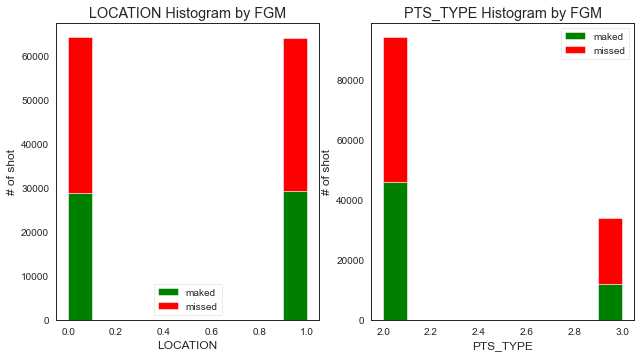

In [20]:
plt.figure(figsize=[16,12])

plt.subplot(234)
plt.hist(x = [df[df['FGM']==1]['LOCATION'], df[df['FGM']==0]['LOCATION']], 
         stacked=True, color = ['g','r'],label = ['maked','missed'])
plt.title('LOCATION Histogram by FGM')
plt.xlabel('LOCATION')
plt.ylabel('# of shot')
plt.legend()


plt.subplot(235)
plt.hist(x = [df[df['FGM']==1]['PTS_TYPE'], df[df['FGM']==0]['PTS_TYPE']], 
         stacked=True, color = ['g','r'],label = ['maked','missed'])
plt.title('PTS_TYPE Histogram by FGM')
plt.xlabel('PTS_TYPE')
plt.ylabel('# of shot')
plt.legend()

<AxesSubplot:xlabel='PTS_TYPE', ylabel='FGM'>

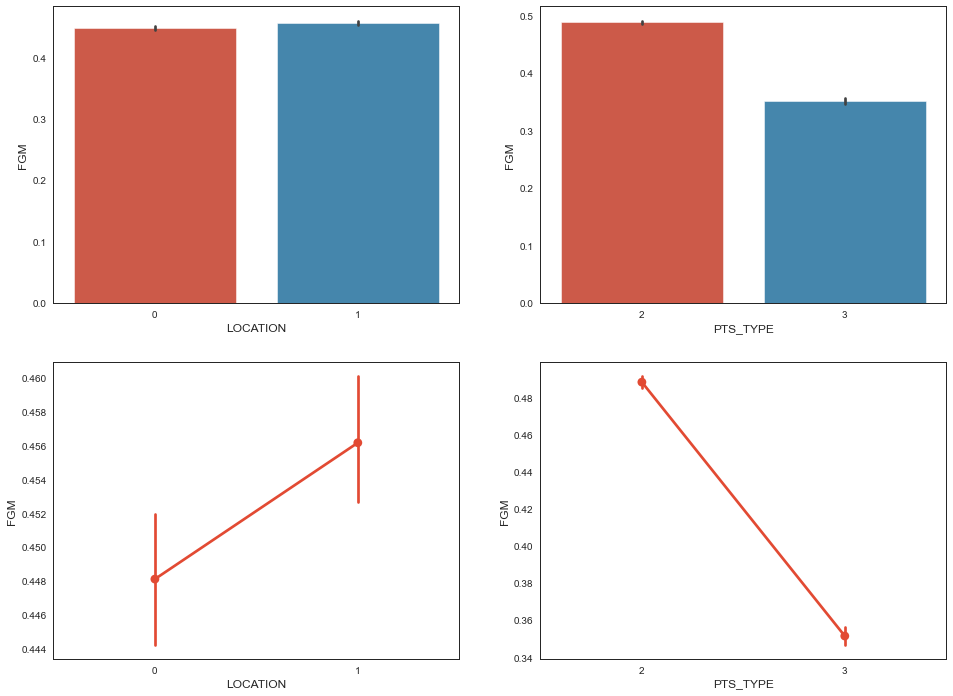

In [21]:
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.barplot(x = 'LOCATION', y = 'FGM', data=df, ax = saxis[0,0])
sns.barplot(x = 'PTS_TYPE', y = 'FGM', data=df, ax = saxis[0,1])

sns.pointplot(x = 'LOCATION', y = 'FGM',  data=df, ax = saxis[1,0])
sns.pointplot(x = 'PTS_TYPE', y = 'FGM', data=df, ax = saxis[1,1])

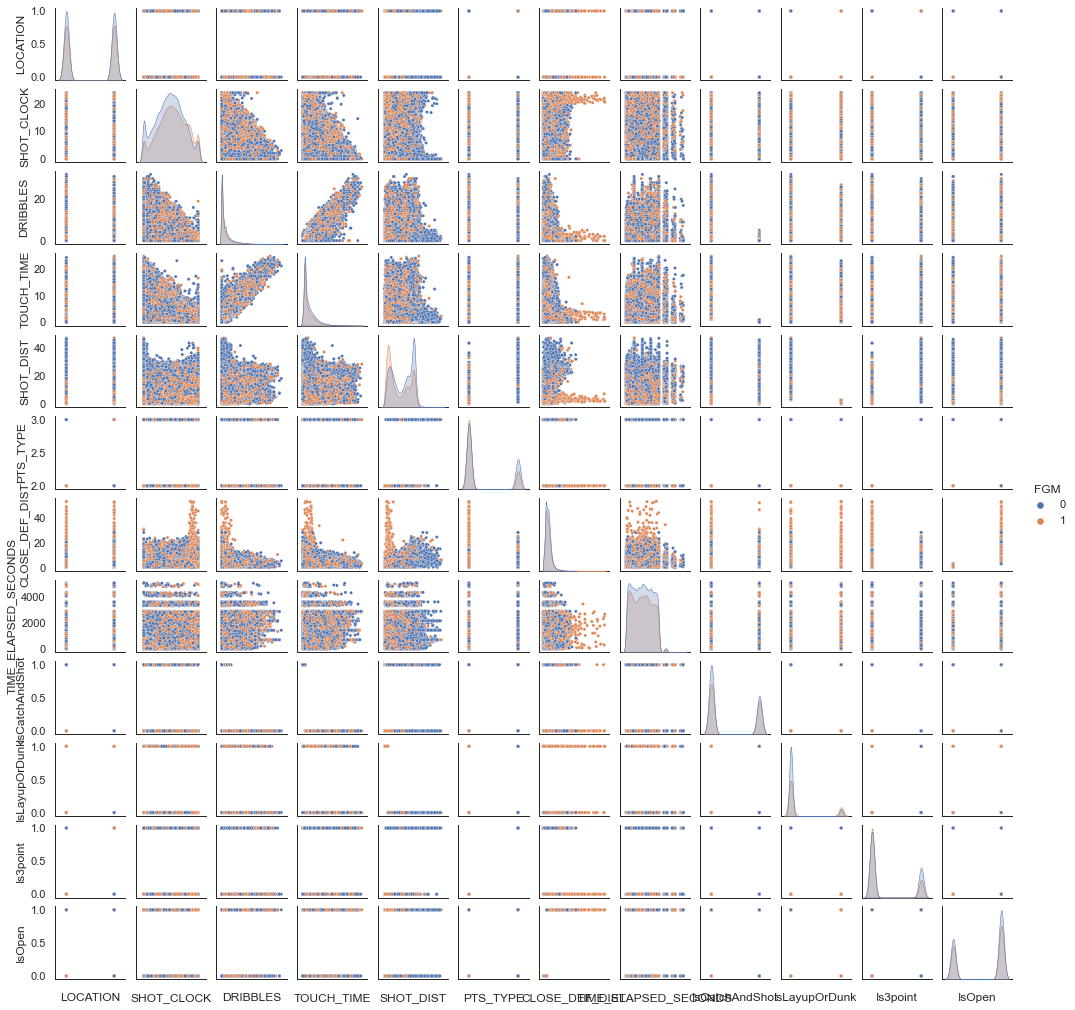

In [132]:
pp = sns.pairplot(df, hue = 'FGM', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

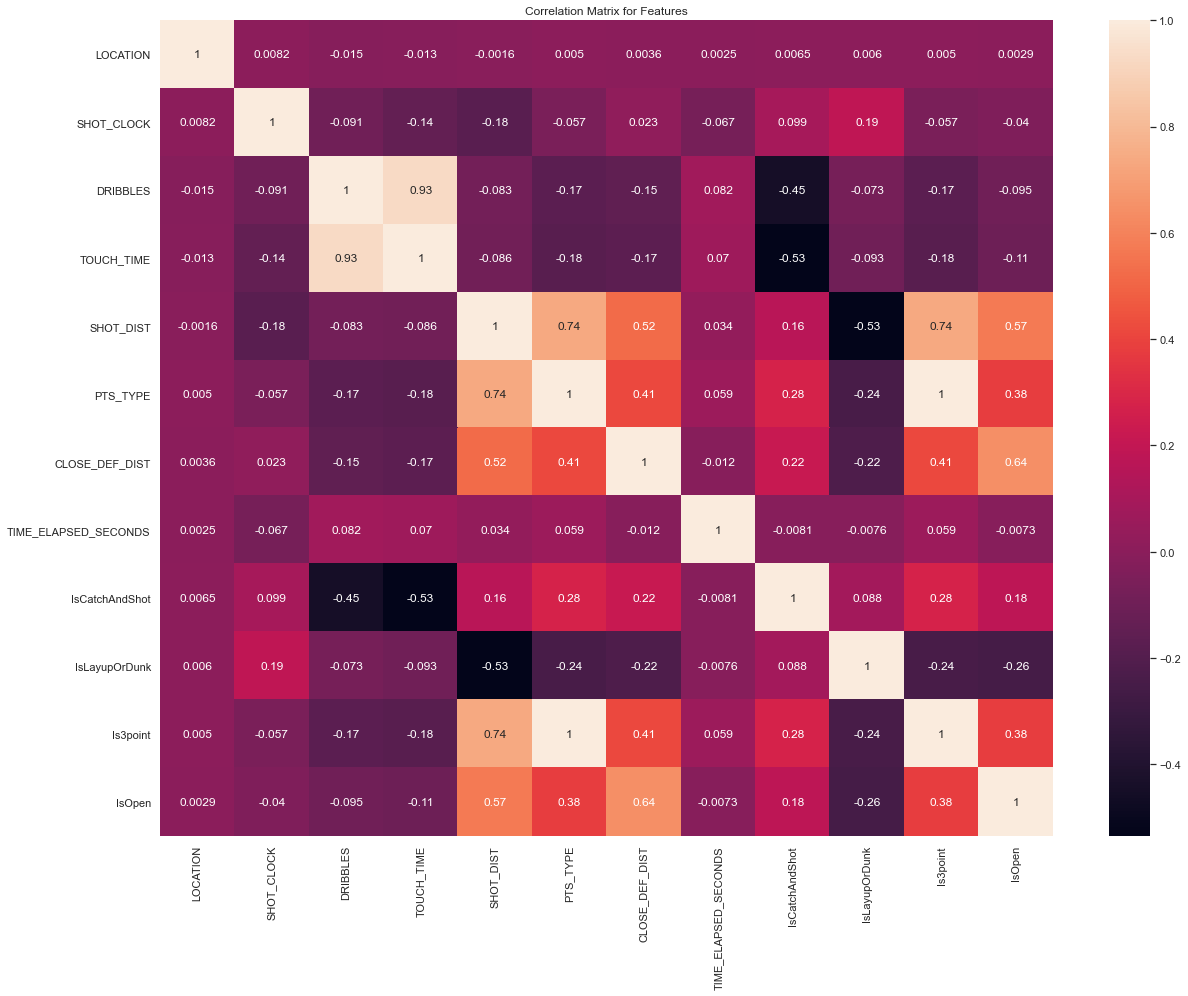

In [72]:
plt.figure(figsize = (20, 15))
sns.set(style="white")
sns.heatmap(X.corr(), annot = True)


plt.title('Correlation Matrix for Features')
plt.show()

# Step 5: Model Data <a class="anchor" id="Model-Data"></a>

### Stacking

In [22]:
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(0.1))    
X = selection.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

K nearest neighbors

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.7690693475184227
- MCC: 0.532316405778505
- F1 score: 0.768386546917778
----------------------------------
Model performance for Test set
- Accuracy: 0.5484891075193253
- MCC: 0.08389749917798749
- F1 score: 0.5469391930269014


Support vector machine (Radial basis function kernel)

In [89]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=2, C=1)
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)


Model performance for Training set
- Accuracy: 0.999843833878288
- MCC: 0.9996848004076216
- F1 score: 0.9998438321090904
----------------------------------
Model performance for Test set
- Accuracy: 0.5471617084406964
- MCC: -0.006220280440359123
- F1 score: 0.3900075856208665


Decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.6197745351617784
- MCC: 0.22533235955841302
- F1 score: 0.587626073367328
----------------------------------
Model performance for Test set
- Accuracy: 0.6153275552432264
- MCC: 0.21516725289276312
- F1 score: 0.5814663776353239


Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 0.9799814552730467
- MCC: 0.9599321698994704
- F1 score: 0.9799470914812355
----------------------------------
Model performance for Test set
- Accuracy: 0.5784336690872179
- MCC: 0.1307509590059537
- F1 score: 0.5631082493627358


Neural network

In [92]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 0.5714899224049583
- MCC: 0.12115230790237887
- F1 score: 0.4676778887490476
----------------------------------
Model performance for Test set
- Accuracy: 0.5757398297805887
- MCC: 0.13786980619850203
- F1 score: 0.47343685196242613


Build Stacked model

In [93]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.8303059879947294
- MCC: 0.6626438123724888
- F1 score: 0.8274178869800831
----------------------------------
Model performance for Test set
- Accuracy: 0.6143515265089404
- MCC: 0.21340217341220097
- F1 score: 0.5790854388984139


### XGBClassifier

In [26]:
from xgboost import XGBClassifier

XGB = XGBClassifier(alpha=1, max_iter=1000)
XGB.fit(X_train, y_train)

# Make predictions
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)

# Training set performance
XGB_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
XGB_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
XGB_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
XGB_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
XGB_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
XGB_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % XGB_train_accuracy)
print('- MCC: %s' % XGB_train_mcc)
print('- F1 score: %s' % XGB_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % XGB_test_accuracy)
print('- MCC: %s' % XGB_test_mcc)
print('- F1 score: %s' % XGB_test_f1)

[13:58:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { max_iter } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Model performance for Training set
- Accuracy: 0.6668391000927236
- MCC: 0.32696507128161406
- F1 score: 0.6493848606968041
----------------------------------
Model performance for Test set
- Accuracy: 0.6135316623721402
- MCC: 0.20722991882455702
- F1 score: 0.5912645655369823


In [97]:
acc_train_list = {'knn':knn_train_accuracy,
'svm_rbf': svm_rbf_train_accuracy,
'dt': dt_train_accuracy,
'rf': rf_train_accuracy,
'mlp': mlp_train_accuracy,
'stack': stack_model_train_accuracy,
'XGBoost': XGB_train_accuracy}

mcc_train_list = {'knn':knn_train_mcc,
'svm_rbf': svm_rbf_train_mcc,
'dt': dt_train_mcc,
'rf': rf_train_mcc,
'mlp': mlp_train_mcc,
'stack': stack_model_train_mcc,
'XGBoost': XGB_train_mcc}

f1_train_list = {'knn':knn_train_f1,
'svm_rbf': svm_rbf_train_f1,
'dt': dt_train_f1,
'rf': rf_train_f1,
'mlp': mlp_train_f1,
'stack': stack_model_train_f1,
'XGBoost': XGB_train_f1}

In [110]:
acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
result_df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
result_df.sort_values(by = ['Accuracy'], ascending = False, inplace = True)
result_df

,Accuracy,MCC,F1
svm_rbf,0.999844,0.999685,0.999844
rf,0.980382,0.960754,0.980347
stack,0.830306,0.662644,0.827418
knn,0.769069,0.532316,0.768387
XGBoost,0.666839,0.326965,0.649385
dt,0.619775,0.225332,0.587626
mlp,0.571490,0.121152,0.467678


Text(0, 0.5, 'Algorithm')

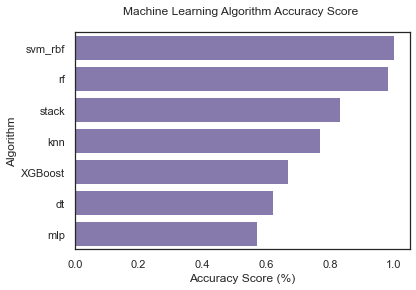

In [111]:
sns.barplot(x='Accuracy',y=result_df.index, data = df, color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

## 5.1 Evaluate Model Performance <a class="anchor" id="Evaluate-Model-Performance"></a>

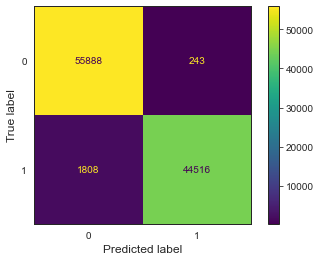

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_train, y_train);

### 5.11 Model Performance with Cross-Validation (CV) <a class="anchor" id="CV"></a>

In [99]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, cv=3)

cv_scores

array([0.57932186, 0.58602717, 0.58510732])

### 5.12 Tune Model with Hyper-Parameters <a class="anchor" id="Tune-Model-with-Hyper-Parameters"></a>

In [101]:
#base model
base_results = model_selection.cross_validate(rf, X_train, y_train, cv=3, return_train_score=True)

print('BEFORE DT Parameters: ', rf.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

#print(list(model_selection.ParameterGrid(param_grid)))

#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = 3, return_train_score=True)
tune_model.fit(X_train, y_train)

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


#duplicates gridsearchcv
#tune_results = model_selection.cross_validate(tune_model, data1[data1_x_bin], data1[Target], cv  = cv_split)

#print('AFTER DT Parameters: ', tune_model.best_params_)
#print("AFTER DT Training w/bin set score mean: {:.2f}". format(tune_results['train_score'].mean()*100)) 
#print("AFTER DT Test w/bin set score mean: {:.2f}". format(tune_results['test_score'].mean()*100))
#print("AFTER DT Test w/bin set score min: {:.2f}". format(tune_results['test_score'].min()*100))
#print('-'*10)

BEFORE DT Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
BEFORE DT Training w/bin score mean: 98.05
BEFORE DT Test w/bin score mean: 58.53
BEFORE DT Test w/bin score 3*std: +/- 0.21
----------
AFTER DT Parameters:  {'criterion': 'entropy', 'max_depth': 10, 'random_state': 0}
AFTER DT Training w/bin score mean: 69.28
AFTER DT Test w/bin score mean: 64.08
AFTER DT Test w/bin score 3*std: +/- 0.62
----------


### 5.13 Tune Model with Feature Selection <a class="anchor" id="Tune-Model-with-Feature-Selection"></a>

In [77]:
x = df.drop(columns='FGM')
print('BEFORE RF RFE Training Shape Old: ', x.shape) 
print('BEFORE RF RFE Training Columns Old: ', x.columns.values)

print("BEFORE RF RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE RF RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)



rf_rfe = feature_selection.RFECV(rf, step = 1, scoring = 'accuracy', cv = 3)
rf_rfe.fit(X_train, y_train)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
X_rfe = x.columns.values[rf_rfe.get_support()]
rfe_results = model_selection.cross_validate(rf, x[X_rfe], y, cv  = 3)

#print(rf_rfe.grid_scores_)
print('AFTER RF RFE Training Shape New: ', x[X_rfe].shape) 
print('AFTER RF RFE Training Columns New: ', X_rfe)

print("AFTER RF RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER RF RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)


#tune rfe model
rfe_tune_model = model_selection.GridSearchCV(rf, param_grid=param_grid, scoring = 'roc_auc', cv = 3)
rfe_tune_model.fit(x[X_rfe], y)

#print(rfe_tune_model.cv_results_.keys())
#print(rfe_tune_model.cv_results_['params'])
print('AFTER RF RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER RF RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER RF RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT RFE Training Shape Old:  (128069, 12)
BEFORE DT RFE Training Columns Old:  ['LOCATION' 'SHOT_CLOCK' 'DRIBBLES' 'TOUCH_TIME' 'SHOT_DIST' 'PTS_TYPE'
 'CLOSE_DEF_DIST' 'TIME_ELAPSED_SECONDS' 'IsCatchAndShot' 'IsLayupOrDunk'
 'Is3point' 'IsOpen']
BEFORE DT RFE Test w/bin score mean: 58.35
BEFORE DT RFE Test w/bin score 3*std: +/- 0.75
----------
AFTER DT RFE Training Shape New:  (128069, 10)
AFTER DT RFE Training Columns New:  ['LOCATION' 'SHOT_CLOCK' 'DRIBBLES' 'TOUCH_TIME' 'SHOT_DIST' 'PTS_TYPE'
 'CLOSE_DEF_DIST' 'TIME_ELAPSED_SECONDS' 'IsLayupOrDunk' 'IsOpen']
AFTER DT RFE Test w/bin score mean: 58.32
AFTER DT RFE Test w/bin score 3*std: +/- 0.54
----------
AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 8, 'random_state': 0}
AFTER DT RFE Tuned Test w/bin score mean: 63.64
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 0.57
----------


In [104]:
rf.feature_importances_

array([0.01571748, 0.19098605, 0.05070894, 0.13528284, 0.19856625,
       0.00308089, 0.1587279 , 0.21733702, 0.00506425, 0.00948688,
       0.00560369, 0.00943779])

<BarContainer object of 12 artists>

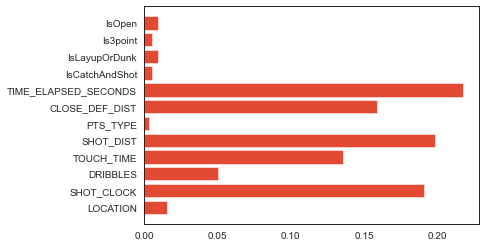

In [114]:
boston = load_boston()
plt.barh(x.columns, rf.feature_importances_)

# Step 6: Validate and Implement <a class="anchor" id="Validate-and-Implement"></a>

# Step 7: Optimize and Strategize<a class="anchor" id="Optimize-and-Strategize"></a>

In [96]:
alg = tree.DecisionTreeClassifier()
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )
cv_results = model_selection.cross_validate(alg, X, y, cv  = cv_split, return_train_score=True)
cv_results

{'fit_time': array([0.47922993, 0.47944093, 0.46598935, 0.46427917, 0.49059892,
        0.4669168 , 0.46071506, 0.4501791 , 0.45098281, 0.44072199]),
 'score_time': array([0.01263905, 0.01447988, 0.01361156, 0.01349974, 0.01221895,
        0.01289701, 0.01215672, 0.01249981, 0.0107131 , 0.01311207]),
 'test_score': array([0.54134458, 0.54103225, 0.5418391 , 0.54311444, 0.5437391 ,
        0.53442128, 0.54103225, 0.54077197, 0.54293225, 0.54425965]),
 'train_score': array([1.        , 0.99998699, 1.        , 1.        , 0.99997397,
        1.        , 0.99998699, 0.99997397, 0.99998699, 0.99998699])}

In [97]:
alg = tree.DecisionTreeClassifier()
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = y

#index through MLA and save performance to table
row_index = 0
    #set name and parameters
MLA_name = alg.__class__.__name__
MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
cv_results = model_selection.cross_validate(alg, X, y, cv  = cv_split, return_train_score=True)

MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
alg.fit(X_train, y_train)
MLA_predict[MLA_name] = alg.predict(y_test)
    
row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. ... 1. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.